In [174]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [175]:
df=pd.read_csv('Prostate_Cancer.csv')
df

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059
...,...,...,...,...,...,...,...,...,...,...
95,96,M,23,16,132,1264,0.091,0.131,0.210,0.056
96,97,B,22,14,78,451,0.105,0.071,0.190,0.066
97,98,B,19,27,62,295,0.102,0.053,0.135,0.069
98,99,B,21,24,74,413,0.090,0.075,0.162,0.066


In [176]:
df
df.columns

Index(['id', 'diagnosis_result', 'radius', 'texture', 'perimeter', 'area',
       'smoothness', 'compactness', 'symmetry', 'fractal_dimension'],
      dtype='object')

In [177]:
df.info()

df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 100 non-null    int64  
 1   diagnosis_result   100 non-null    object 
 2   radius             100 non-null    int64  
 3   texture            100 non-null    int64  
 4   perimeter          100 non-null    int64  
 5   area               100 non-null    int64  
 6   smoothness         100 non-null    float64
 7   compactness        100 non-null    float64
 8   symmetry           100 non-null    float64
 9   fractal_dimension  100 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


,count,mean,std,min,25%,50%,75%,max
id,100.0,50.50000,29.011492,1.000,25.7500,50.5000,75.250,100.000
radius,100.0,16.85000,4.879094,9.000,12.0000,17.0000,21.000,25.000
texture,100.0,18.23000,5.192954,11.000,14.0000,17.5000,22.250,27.000
perimeter,100.0,96.78000,23.676089,52.000,82.5000,94.0000,114.250,172.000
area,100.0,702.88000,319.710895,202.000,476.7500,644.0000,917.000,1878.000
smoothness,100.0,0.10273,0.014642,0.070,0.0935,0.1020,0.112,0.143
compactness,100.0,0.12670,0.061144,0.038,0.0805,0.1185,0.157,0.345
symmetry,100.0,0.19317,0.030785,0.135,0.1720,0.1900,0.209,0.304
fractal_dimension,100.0,0.06469,0.008151,0.053,0.0590,0.0630,0.069,0.097


In [178]:

# Define the number of augmented samples you want to create
num_augmented_samples = 1000  # Adjust this as needed

# Initialize an empty DataFrame to store the augmented data
augmented_data = pd.DataFrame(columns=df.columns)

# Define the range for random data modification
# You can adjust these ranges as needed
radius_range = (-5, 5)
texture_range = (-5, 5)
perimeter_range = (-10, 10)
area_range = (-100, 100)
smoothness_range = (-0.02, 0.02)
compactness_range = (-0.02, 0.02)
symmetry_range = (-0.02, 0.02)
fractal_dimension_range = (-0.01, 0.01)

for _ in range(num_augmented_samples):
    # Randomly select an existing row to modify
    original_row = df.sample(1)

    # Create a new row with random modifications
    augmented_row = original_row.copy()
    augmented_row['radius'] += np.random.uniform(*radius_range)
    augmented_row['texture'] += np.random.uniform(*texture_range)
    augmented_row['perimeter'] += np.random.uniform(*perimeter_range)
    augmented_row['area'] += np.random.uniform(*area_range)
    augmented_row['smoothness'] += np.random.uniform(*smoothness_range)
    augmented_row['compactness'] += np.random.uniform(*compactness_range)
    augmented_row['symmetry'] += np.random.uniform(*symmetry_range)
    augmented_row['fractal_dimension'] += np.random.uniform(*fractal_dimension_range)

    # Append the augmented row to the new DataFrame
    augmented_data = pd.concat([augmented_data, augmented_row], ignore_index=True)

# Concatenate the original data and the augmented data
augmented_dataset = pd.concat([df, augmented_data], ignore_index=True)

augmented_dataset

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23.000000,12.000000,151.000000,954.000000,0.143000,0.278000,0.242000,0.079000
1,2,B,9.000000,13.000000,133.000000,1326.000000,0.143000,0.079000,0.181000,0.057000
2,3,M,21.000000,27.000000,130.000000,1203.000000,0.125000,0.160000,0.207000,0.060000
3,4,M,14.000000,16.000000,78.000000,386.000000,0.070000,0.284000,0.260000,0.097000
4,5,M,9.000000,19.000000,135.000000,1297.000000,0.141000,0.133000,0.181000,0.059000
...,...,...,...,...,...,...,...,...,...,...
1095,43,M,10.213936,7.489747,130.411144,1162.913799,0.085140,0.199876,0.241750,0.072246
1096,93,B,9.939152,9.486886,81.666401,488.467783,0.090531,0.069953,0.123467,0.044422
1097,86,M,11.702223,11.994581,111.112356,994.882300,0.100509,0.090767,0.200701,0.059461
1098,65,M,11.427130,18.669838,79.217813,479.139956,0.123500,0.128852,0.191069,0.061649


In [179]:
for col in augmented_dataset.columns:
    print(f"Unique values in column '{col}': {augmented_dataset[col].unique()}")

Unique values in column 'id': [1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75
 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99
 100]
Unique values in column 'diagnosis_result': ['M' 'B']
Unique values in column 'radius': [23.          9.         21.         ... 11.70222313 11.42713044
 13.29641277]
Unique values in column 'texture': [12.         13.         27.         ... 11.99458137 18.66983818
 17.33074416]
Unique values in column 'perimeter': [151.         133.         130.         ... 111.11235555  79.21781298
  96.90772174]
Unique values in column 'area': [ 954.         1326.         1203.         ...  994.88229993  479.13995594
  760.17191362]
Unique values in column 'smoothness': [0.143      0.125      0.07       ... 0.10050866 0.12350045 0.08752592]
Unique values in column 'compactness

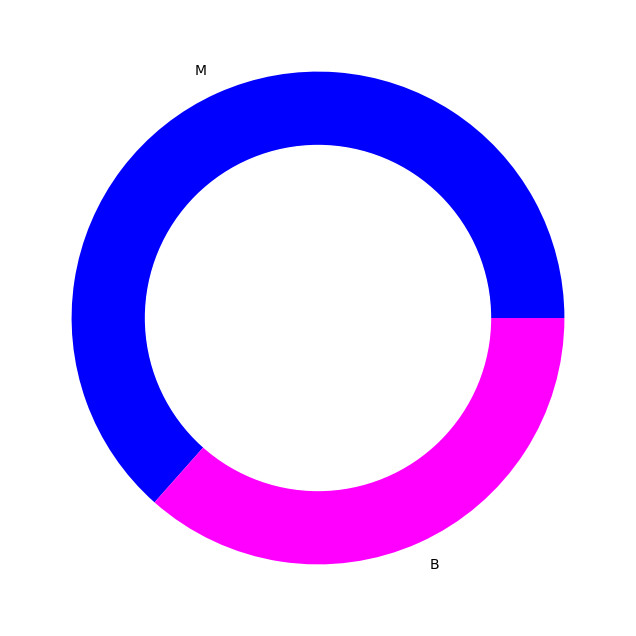

In [180]:
plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(augmented_dataset.diagnosis_result.value_counts(), labels=['M','B'], colors=['blue', 'magenta'])
p = plt.gcf()
p.gca().add_artist(circle)

In [181]:
# as there are 7 classes, so there will be 7 different dataframes
data_1 = augmented_dataset[augmented_dataset['diagnosis_result'] == 'M']
data_2 = augmented_dataset[augmented_dataset['diagnosis_result'] == 'B']

data_2

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
1,2,B,9.000000,13.000000,133.000000,1326.000000,0.143000,0.079000,0.181000,0.057000
5,6,B,25.000000,25.000000,83.000000,477.000000,0.128000,0.170000,0.209000,0.076000
12,13,B,14.000000,15.000000,132.000000,1123.000000,0.097000,0.246000,0.240000,0.078000
19,20,B,17.000000,11.000000,87.000000,566.000000,0.098000,0.081000,0.189000,0.058000
20,21,B,16.000000,14.000000,86.000000,520.000000,0.108000,0.127000,0.197000,0.068000
...,...,...,...,...,...,...,...,...,...,...
1074,67,B,13.348822,8.459132,51.530557,218.487903,0.085697,0.059064,0.153828,0.072248
1088,91,B,24.170601,24.680710,88.658399,722.526234,0.097860,0.074812,0.179484,0.064291
1090,49,B,17.149172,21.480721,87.921732,415.698465,0.110690,0.109487,0.154905,0.055661
1092,51,B,17.999097,24.248694,66.670117,414.290096,0.075590,0.069202,0.138913,0.053286


In [182]:
augmented_dataset.shape

(1100, 10)

In [183]:
1100 / 2

550.0

In [184]:
# applying resampling through sampling function in sklearn
from sklearn.utils import resample

# we will put 200 samples in each class
data_1_resample = resample(data_1, n_samples=550, 
                           random_state=123, replace=True)
data_2_resample = resample(data_2, n_samples=550, 
                           random_state=123, replace=True)



print(data_1)
print(data_2_resample)

augmented_dataset = pd.concat([data_1_resample, data_2_resample])


augmented_dataset

      id diagnosis_result     radius    texture   perimeter         area   
0      1                M  23.000000  12.000000  151.000000   954.000000  \
2      3                M  21.000000  27.000000  130.000000  1203.000000   
3      4                M  14.000000  16.000000   78.000000   386.000000   
4      5                M   9.000000  19.000000  135.000000  1297.000000   
6      7                M  16.000000  26.000000  120.000000  1040.000000   
...   ..              ...        ...        ...         ...          ...   
1094  39                M   8.752971  19.380237   92.129672   613.138020   
1095  43                M  10.213936   7.489747  130.411144  1162.913799   
1097  86                M  11.702223  11.994581  111.112356   994.882300   
1098  65                M  11.427130  18.669838   79.217813   479.139956   
1099  14                M  13.296413  17.330744   96.907722   760.171914   

      smoothness  compactness  symmetry  fractal_dimension  
0       0.143000     0.278

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
805,95,M,22.223496,23.993069,108.362654,697.884518,0.099114,0.140097,0.191956,0.070360
571,83,M,10.980513,10.100932,180.679097,1793.377426,0.105126,0.270445,0.164399,0.068344
603,73,M,16.479283,9.336017,106.759932,997.617136,0.119646,0.167575,0.208451,0.060985
502,48,M,18.513474,10.665297,93.210554,565.143374,0.099840,0.126891,0.206799,0.076705
157,43,M,6.754246,8.330067,127.402622,1177.621730,0.079317,0.233725,0.246414,0.068765
...,...,...,...,...,...,...,...,...,...,...
791,80,B,17.470807,12.173090,86.688158,574.849321,0.083707,0.105707,0.184686,0.056168
174,53,B,22.350041,17.222104,75.717462,500.569231,0.067274,0.034296,0.179550,0.064732
738,67,B,7.114100,16.952504,50.954236,221.912977,0.112555,0.069720,0.154811,0.066365
972,89,B,10.715905,9.838828,76.566952,385.589613,0.095939,0.111912,0.190282,0.068707


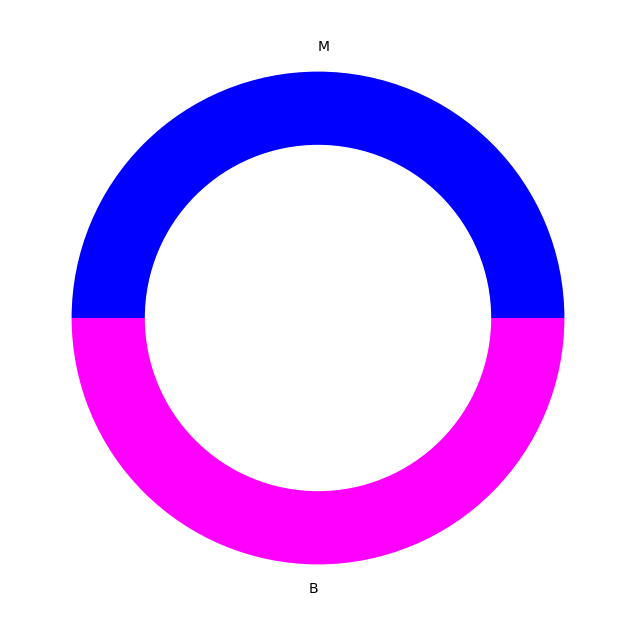

In [185]:
plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(augmented_dataset.diagnosis_result.value_counts(), labels=['M','B'], colors=['blue', 'magenta'])
p = plt.gcf()
p.gca().add_artist(circle)

In [186]:
augmented_dataset['diagnosis_result'] = augmented_dataset['diagnosis_result'].replace({'M': 1, 'B': 0})


                   diagnosis_result
id                        -0.299614
diagnosis_result           1.000000
radius                    -0.128162
texture                    0.076876
perimeter                  0.624632
area                       0.589514
smoothness                 0.163829
compactness                0.524478
symmetry                   0.251839
fractal_dimension          0.025199


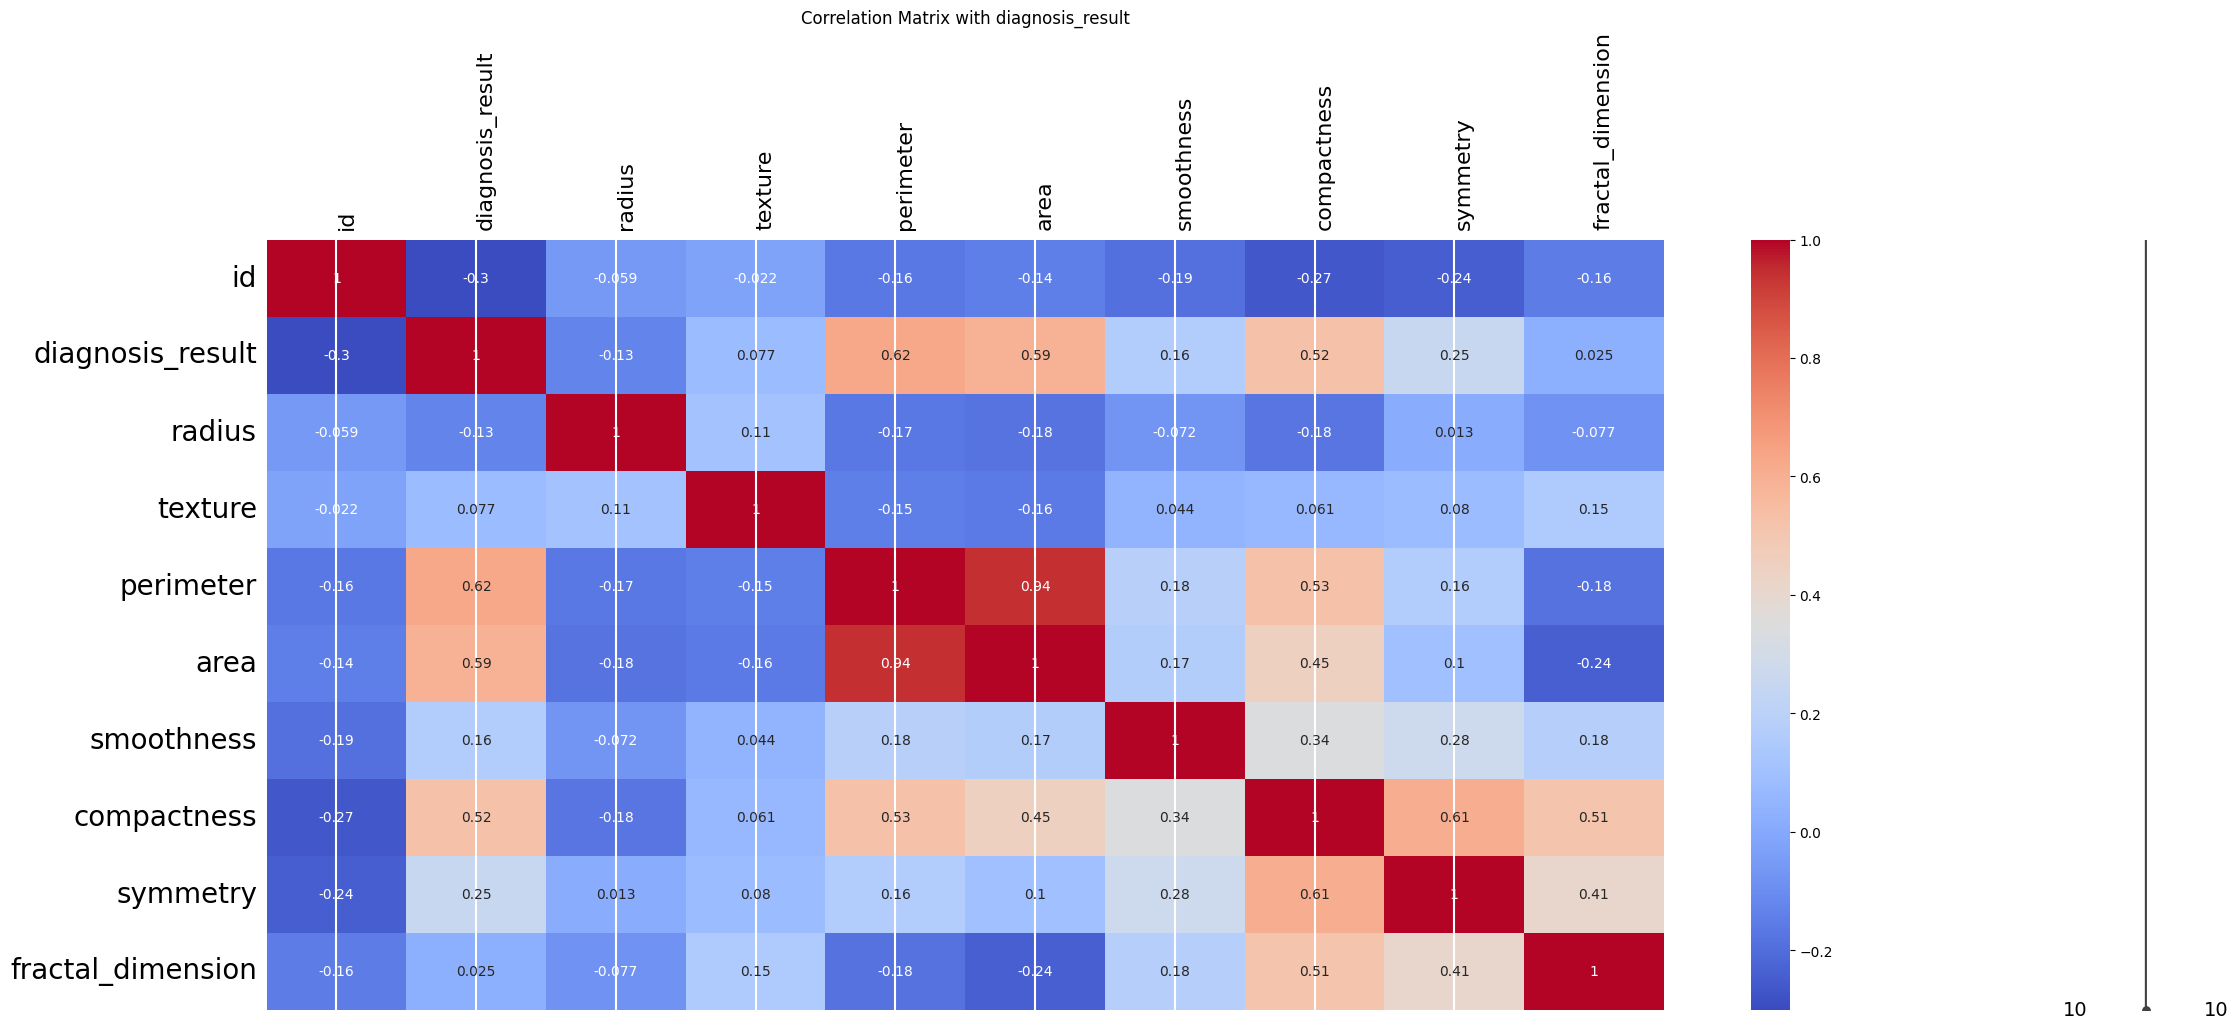

In [187]:
msno.matrix(augmented_dataset)

chosen_column = "diagnosis_result" 

# for col in augmented_dataset.columns:
#     if col != chosen_column:
#         plt.scatter(augmented_dataset[chosen_column], augmented_dataset[col])
#         plt.xlabel(chosen_column)
#         plt.ylabel(col)
#         plt.title(f"Scatter Plot of {col} vs. {chosen_column}")
#         plt.show()

corr_matrix = augmented_dataset.corr(method='pearson')

# display the correlations between each column and the chosen column
print(corr_matrix[[chosen_column]])   #The values range from -1 to 1, with values close to -1 indicating a strong negative correlation, values close to 1 indicating a strong positive correlation, and values close to 0 indicating little to no correlation. 

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title(f"Correlation Matrix with {chosen_column}")
plt.show()  #The color scale indicates the strength of the correlation, with red indicating a positive correlation and blue indicating a negative correlation. The darker the color, the stronger the correlation. The diagonal line in the heatmap represents the correlation of each variable with itself, which is always 1.

In [188]:
augmented_dataset.drop('compactness', axis=1, inplace=True)


In [189]:
# checking for some null, missing or NaN values
augmented_dataset.isnull().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

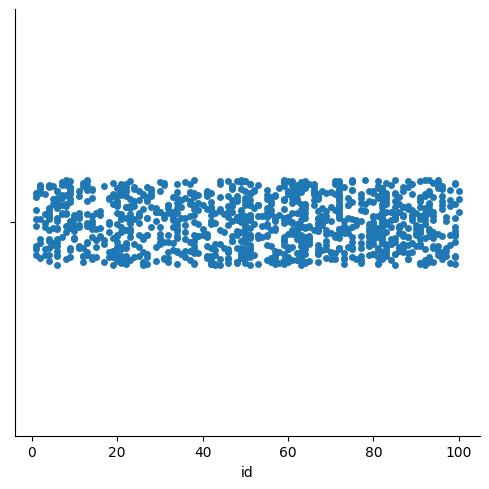

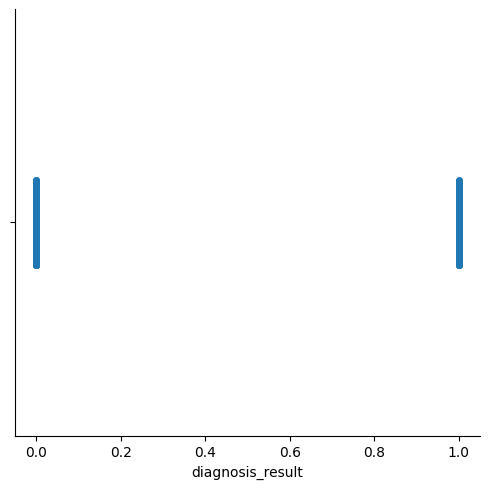

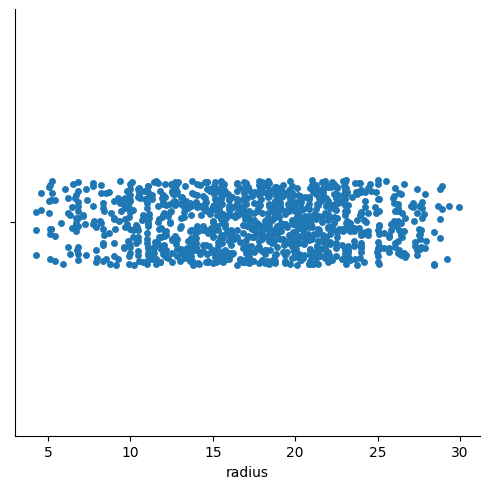

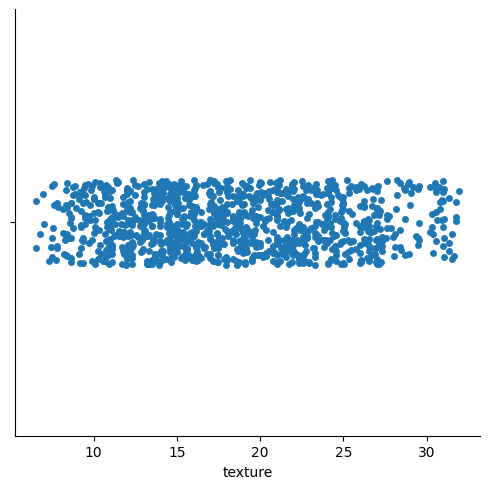

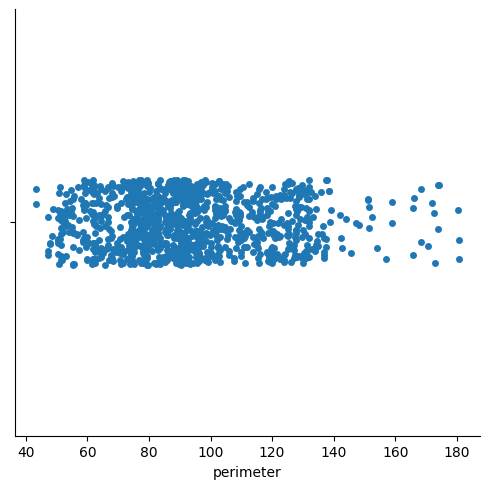

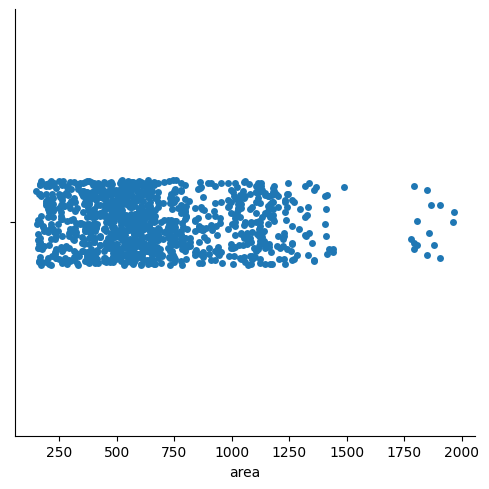

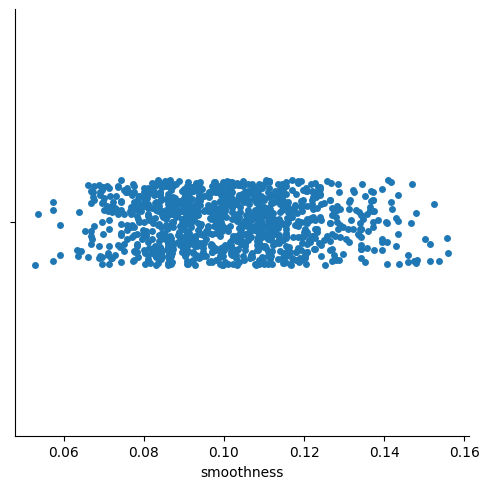

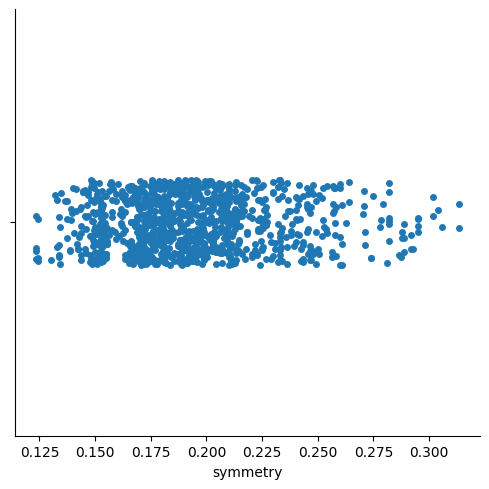

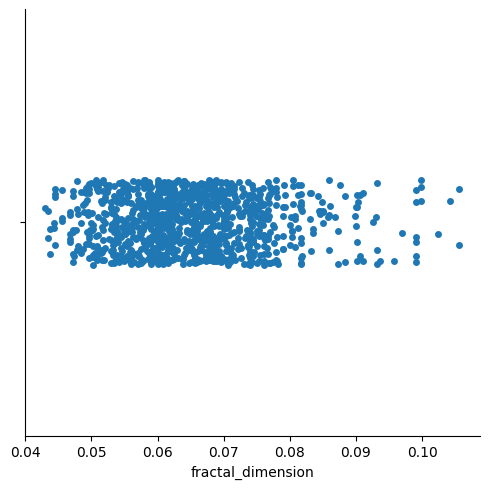

In [190]:
# cgecking for some outliers in dataset
# sns.catplot(y='diagnosis_result', x='id', data=augmented_dataset.sort_values("diagnosis_result", ascending=False),
#            kind='boxen', height=6, aspect=3)

for col in augmented_dataset.columns:
    sns.catplot(x = col, data = augmented_dataset)

In [191]:



ls = ["area", "smoothness", "symmetry", "fractal_dimension"]

for i in ls:
#     column_name = f'{i}'
    print(augmented_dataset[i].mean())
    print(augmented_dataset[i].std())
    new_column_name = f'{i}_zscore'
    augmented_dataset[new_column_name] = ( augmented_dataset[i] - augmented_dataset[i].mean() ) / augmented_dataset[i].std()
augmented_dataset.head()

655.5667260545304
327.29788866809724
0.10106462710171787
0.018445454072118755
0.19289175978805148
0.033365843443938156
0.06483730710430954
0.010298997530612098


,id,diagnosis_result,radius,texture,perimeter,area,smoothness,symmetry,fractal_dimension,area_zscore,smoothness_zscore,symmetry_zscore,fractal_dimension_zscore
805,95,1,22.223496,23.993069,108.362654,697.884518,0.099114,0.191956,0.070360,0.129294,-0.105762,-0.028053,0.536229
571,83,1,10.980513,10.100932,180.679097,1793.377426,0.105126,0.164399,0.068344,3.476377,0.220174,-0.853939,0.340493
603,73,1,16.479283,9.336017,106.759932,997.617136,0.119646,0.208451,0.060985,1.045074,1.007370,0.466319,-0.374094
502,48,1,18.513474,10.665297,93.210554,565.143374,0.099840,0.206799,0.076705,-0.276272,-0.066386,0.416805,1.152293
157,43,1,6.754246,8.330067,127.402622,1177.621730,0.079317,0.246414,0.068765,1.595045,-1.179047,1.604107,0.381350


In [192]:
ls2 = ["area_zscore", "smoothness_zscore", "symmetry_zscore", "fractal_dimension_zscore"]

for i in ls2:
    print(augmented_dataset[augmented_dataset[i]>3])

     id  diagnosis_result     radius    texture   perimeter         area   
571  83                 1  10.980513  10.100932  180.679097  1793.377426  \
111  83                 1  13.455073  10.234734  180.274821  1794.598380   
571  83                 1  10.980513  10.100932  180.679097  1793.377426   
565  83                 1  10.337400  11.435990  174.090687  1963.377649   
757  83                 1  11.795465  17.255608  168.301804  1850.222501   
774  83                 1  10.434864  10.742097  165.941657  1860.051100   
976  83                 1   6.003714  13.625355  172.980638  1867.738690   
486  83                 1  13.665387  19.775948  173.985924  1908.124539   
486  83                 1  13.665387  19.775948  173.985924  1908.124539   
940  83                 1  13.245142  13.837088  170.784611  1965.432932   
332  83                 1   6.544720  11.100946  172.573963  1780.695039   
82   83                 1  10.000000  15.000000  172.000000  1878.000000   
757  83     

In [193]:
 #data which have standard deviation high than 3 or lower -3 are always outliers. (sometimes it can be 2.3 or 2.5 also possible in place of 3, sometimes 4 is also possible, it depends on dataset)

for i in ls2:
    print(augmented_dataset[augmented_dataset[i]< -3])

Empty DataFrame
Columns: [id, diagnosis_result, radius, texture, perimeter, area, smoothness, symmetry, fractal_dimension, area_zscore, smoothness_zscore, symmetry_zscore, fractal_dimension_zscore]
Index: []
Empty DataFrame
Columns: [id, diagnosis_result, radius, texture, perimeter, area, smoothness, symmetry, fractal_dimension, area_zscore, smoothness_zscore, symmetry_zscore, fractal_dimension_zscore]
Index: []
Empty DataFrame
Columns: [id, diagnosis_result, radius, texture, perimeter, area, smoothness, symmetry, fractal_dimension, area_zscore, smoothness_zscore, symmetry_zscore, fractal_dimension_zscore]
Index: []
Empty DataFrame
Columns: [id, diagnosis_result, radius, texture, perimeter, area, smoothness, symmetry, fractal_dimension, area_zscore, smoothness_zscore, symmetry_zscore, fractal_dimension_zscore]
Index: []


In [194]:


for i in ls2:
    print(augmented_dataset[(augmented_dataset[i]<-3) | (augmented_dataset[i]>3)]) #This all are otliers

     id  diagnosis_result     radius    texture   perimeter         area   
571  83                 1  10.980513  10.100932  180.679097  1793.377426  \
111  83                 1  13.455073  10.234734  180.274821  1794.598380   
571  83                 1  10.980513  10.100932  180.679097  1793.377426   
565  83                 1  10.337400  11.435990  174.090687  1963.377649   
757  83                 1  11.795465  17.255608  168.301804  1850.222501   
774  83                 1  10.434864  10.742097  165.941657  1860.051100   
976  83                 1   6.003714  13.625355  172.980638  1867.738690   
486  83                 1  13.665387  19.775948  173.985924  1908.124539   
486  83                 1  13.665387  19.775948  173.985924  1908.124539   
940  83                 1  13.245142  13.837088  170.784611  1965.432932   
332  83                 1   6.544720  11.100946  172.573963  1780.695039   
82   83                 1  10.000000  15.000000  172.000000  1878.000000   
757  83     

In [195]:
   
df2 = augmented_dataset[(augmented_dataset.area_zscore>-3) & (augmented_dataset.area_zscore<3) & (augmented_dataset.smoothness_zscore>-3) & (augmented_dataset.smoothness_zscore<3) & (augmented_dataset.symmetry_zscore>-3) & (augmented_dataset.symmetry_zscore<3) & (augmented_dataset.fractal_dimension_zscore>-3) & (augmented_dataset.fractal_dimension_zscore<3)]
df2

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,symmetry,fractal_dimension,area_zscore,smoothness_zscore,symmetry_zscore,fractal_dimension_zscore
805,95,1,22.223496,23.993069,108.362654,697.884518,0.099114,0.191956,0.070360,0.129294,-0.105762,-0.028053,0.536229
603,73,1,16.479283,9.336017,106.759932,997.617136,0.119646,0.208451,0.060985,1.045074,1.007370,0.466319,-0.374094
502,48,1,18.513474,10.665297,93.210554,565.143374,0.099840,0.206799,0.076705,-0.276272,-0.066386,0.416805,1.152293
157,43,1,6.754246,8.330067,127.402622,1177.621730,0.079317,0.246414,0.068765,1.595045,-1.179047,1.604107,0.381350
23,24,1,19.000000,12.000000,137.000000,1404.000000,0.094000,0.177000,0.053000,2.286704,-0.383001,-0.476288,-1.149365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
791,80,0,17.470807,12.173090,86.688158,574.849321,0.083707,0.184686,0.056168,-0.246618,-0.940999,-0.245933,-0.841809
174,53,0,22.350041,17.222104,75.717462,500.569231,0.067274,0.179550,0.064732,-0.473567,-1.831936,-0.399852,-0.010199
738,67,0,7.114100,16.952504,50.954236,221.912977,0.112555,0.154811,0.066365,-1.324951,0.622958,-1.141320,0.148324
972,89,0,10.715905,9.838828,76.566952,385.589613,0.095939,0.190282,0.068707,-0.824867,-0.277861,-0.078211,0.375740


In [196]:
df2.shape

(1060, 13)

In [197]:
augmented_dataset.shape[0] - df2.shape[0]

40

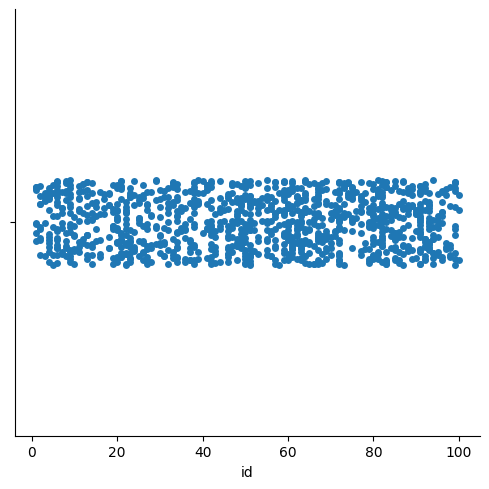

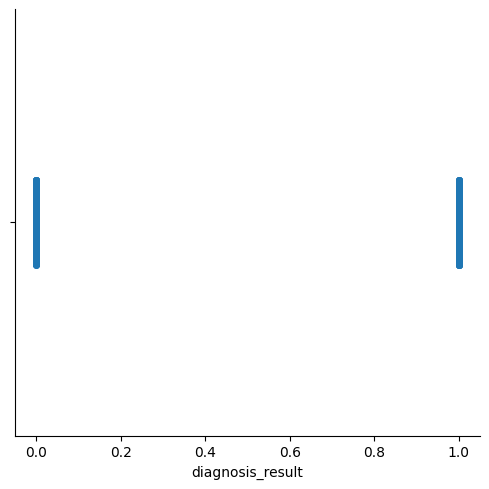

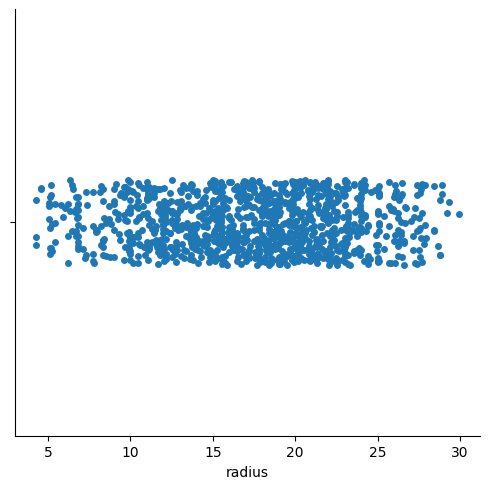

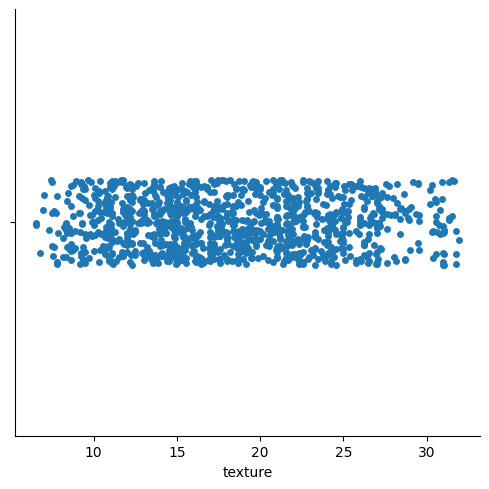

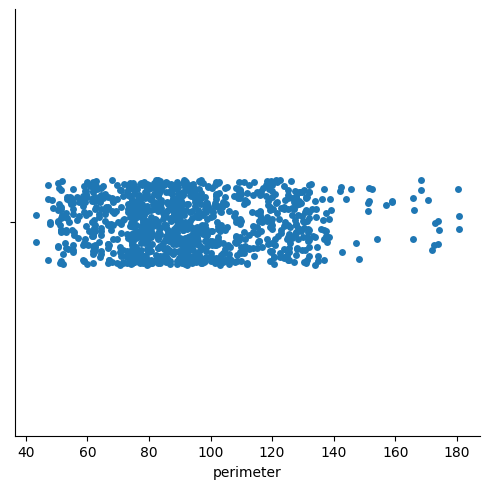

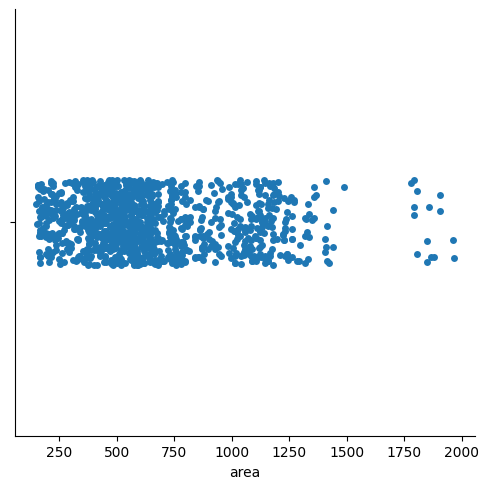

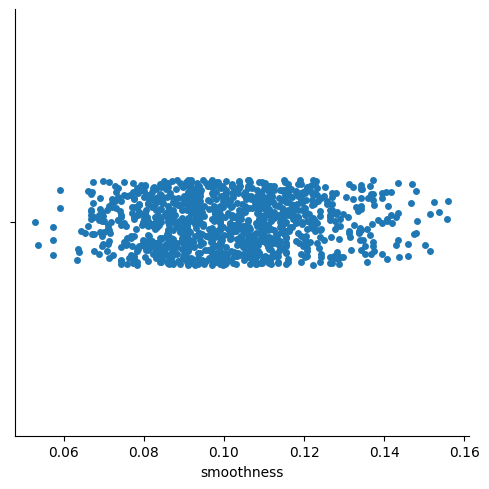

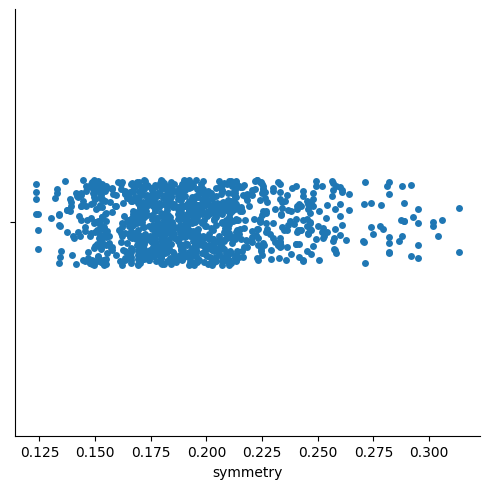

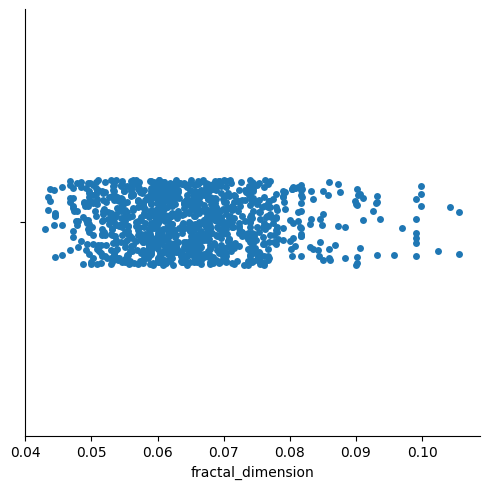

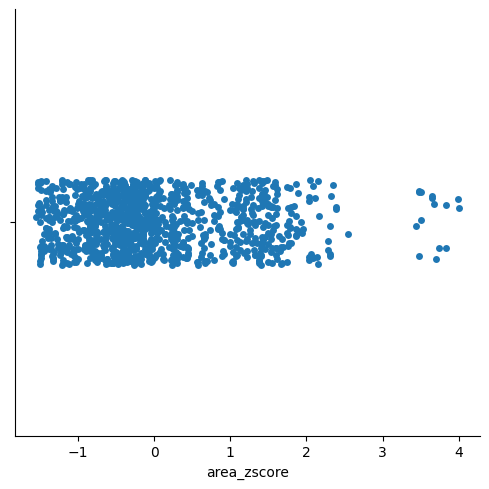

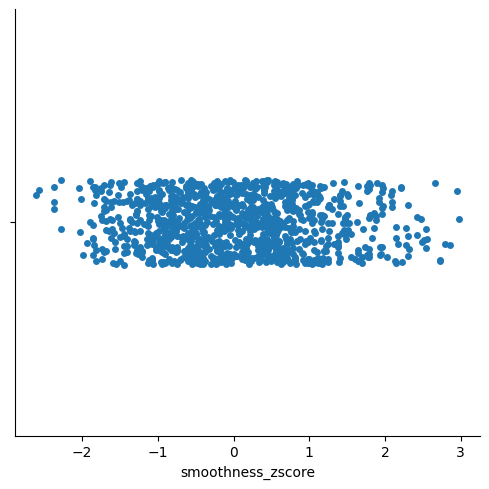

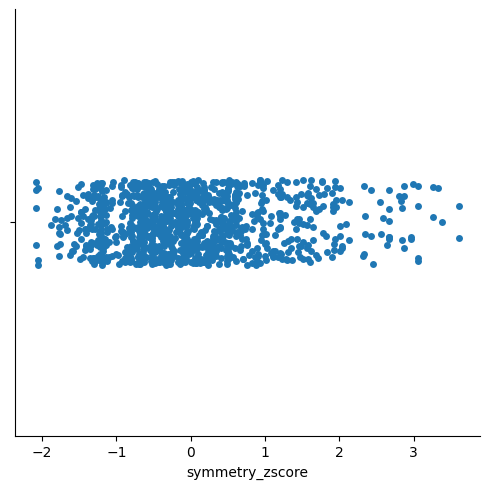

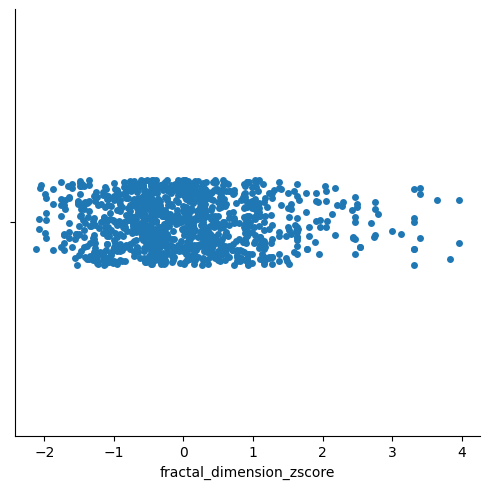

In [198]:
# cgecking for some outliers in dataset
# sns.catplot(y='diagnosis_result', x='id', data=augmented_dataset.sort_values("diagnosis_result", ascending=False),
#            kind='boxen', height=6, aspect=3)

for col in augmented_dataset.columns:
    sns.catplot(x = col, data = augmented_dataset)

In [199]:
del df2["area_zscore"]
del df2["smoothness_zscore"]
del df2["symmetry_zscore"]
del df2["fractal_dimension_zscore"]

In [200]:
### Independent and Dependent features
X=df2.iloc[:,2:]
y=df2.iloc[:,1]

In [201]:
X.head()

,radius,texture,perimeter,area,smoothness,symmetry,fractal_dimension
805,22.223496,23.993069,108.362654,697.884518,0.099114,0.191956,0.070360
603,16.479283,9.336017,106.759932,997.617136,0.119646,0.208451,0.060985
502,18.513474,10.665297,93.210554,565.143374,0.099840,0.206799,0.076705
157,6.754246,8.330067,127.402622,1177.621730,0.079317,0.246414,0.068765
23,19.000000,12.000000,137.000000,1404.000000,0.094000,0.177000,0.053000


In [202]:
y.head(20)

805     1
603     1
502     1
157     1
23      1
944     1
167     1
192     1
897     1
322     1
155     1
177     1
1016    1
70      1
118     1
863     1
340     1
175     1
642     1
531     1
Name: diagnosis_result, dtype: int64

In [203]:
### Train Test Split
from sklearn.model_selection import train_test_split

In [204]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [205]:
from sklearn.ensemble import RandomForestClassifier
ranfor=RandomForestClassifier()
ranfor.fit(X_train,y_train)

RandomForestClassifier()

In [206]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, y_train)

C:\Users\Meet Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [207]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=24)

In [210]:
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [211]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [212]:
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [213]:
Y_pred_logreg = logreg.predict(X_test)
Y_pred_knn = knn.predict(X_test)
Y_pred_svc = svc.predict(X_test)
Y_pred_nb = nb.predict(X_test)
Y_pred_dectree = dectree.predict(X_test)
Y_pred_ranfor = ranfor.predict(X_test)

In [214]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(y_test, Y_pred_logreg)
accuracy_knn = accuracy_score(y_test, Y_pred_knn)
accuracy_svc = accuracy_score(y_test, Y_pred_svc)
accuracy_nb = accuracy_score(y_test, Y_pred_nb)
accuracy_dectree = accuracy_score(y_test, Y_pred_dectree)
accuracy_ranfor = accuracy_score(y_test, Y_pred_ranfor)

In [215]:
### Check Accuracy
from sklearn.metrics import accuracy_score
# Accuracy on test set
print("Logistic Regression: " + str(accuracy_logreg * 100))
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Decision tree: " + str(accuracy_dectree * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))

Logistic Regression: 82.0754716981132
K Nearest neighbors: 88.36477987421384
Support Vector Classifier: 83.33333333333334
Naive Bayes: 83.9622641509434
Decision tree: 94.33962264150944
Random Forest: 89.30817610062893


In [216]:
ls = [accuracy_logreg, accuracy_knn, accuracy_svc, accuracy_nb, accuracy_dectree, accuracy_ranfor]
ls_model = [logreg, knn, svc, nb, dectree, ranfor]

BestFitIndex = ls.index(max(ls))
BestFitModelName = ls_model[BestFitIndex]
BestFitModelName

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [217]:
from sklearn.metrics import confusion_matrix
y_pred = BestFitModelName.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[160,   7],
       [ 11, 140]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

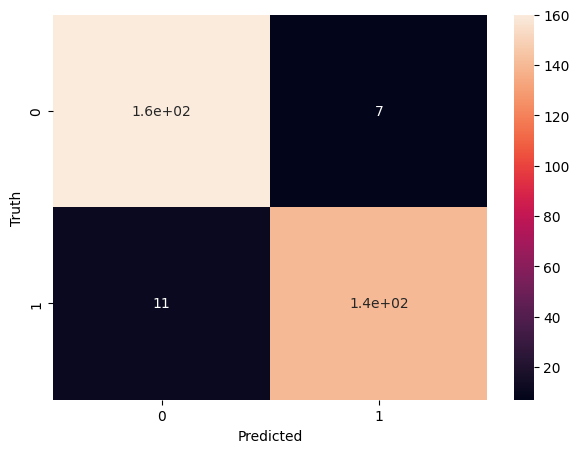

In [218]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [219]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       167
           1       0.95      0.93      0.94       151

    accuracy                           0.94       318
   macro avg       0.94      0.94      0.94       318
weighted avg       0.94      0.94      0.94       318



In [220]:
#Creating a pickle file for making an API

pickle_out = open("Prostate_Cancer.pkl","wb")
pickle.dump(BestFitModelName, pickle_out)
pickle_out.close()